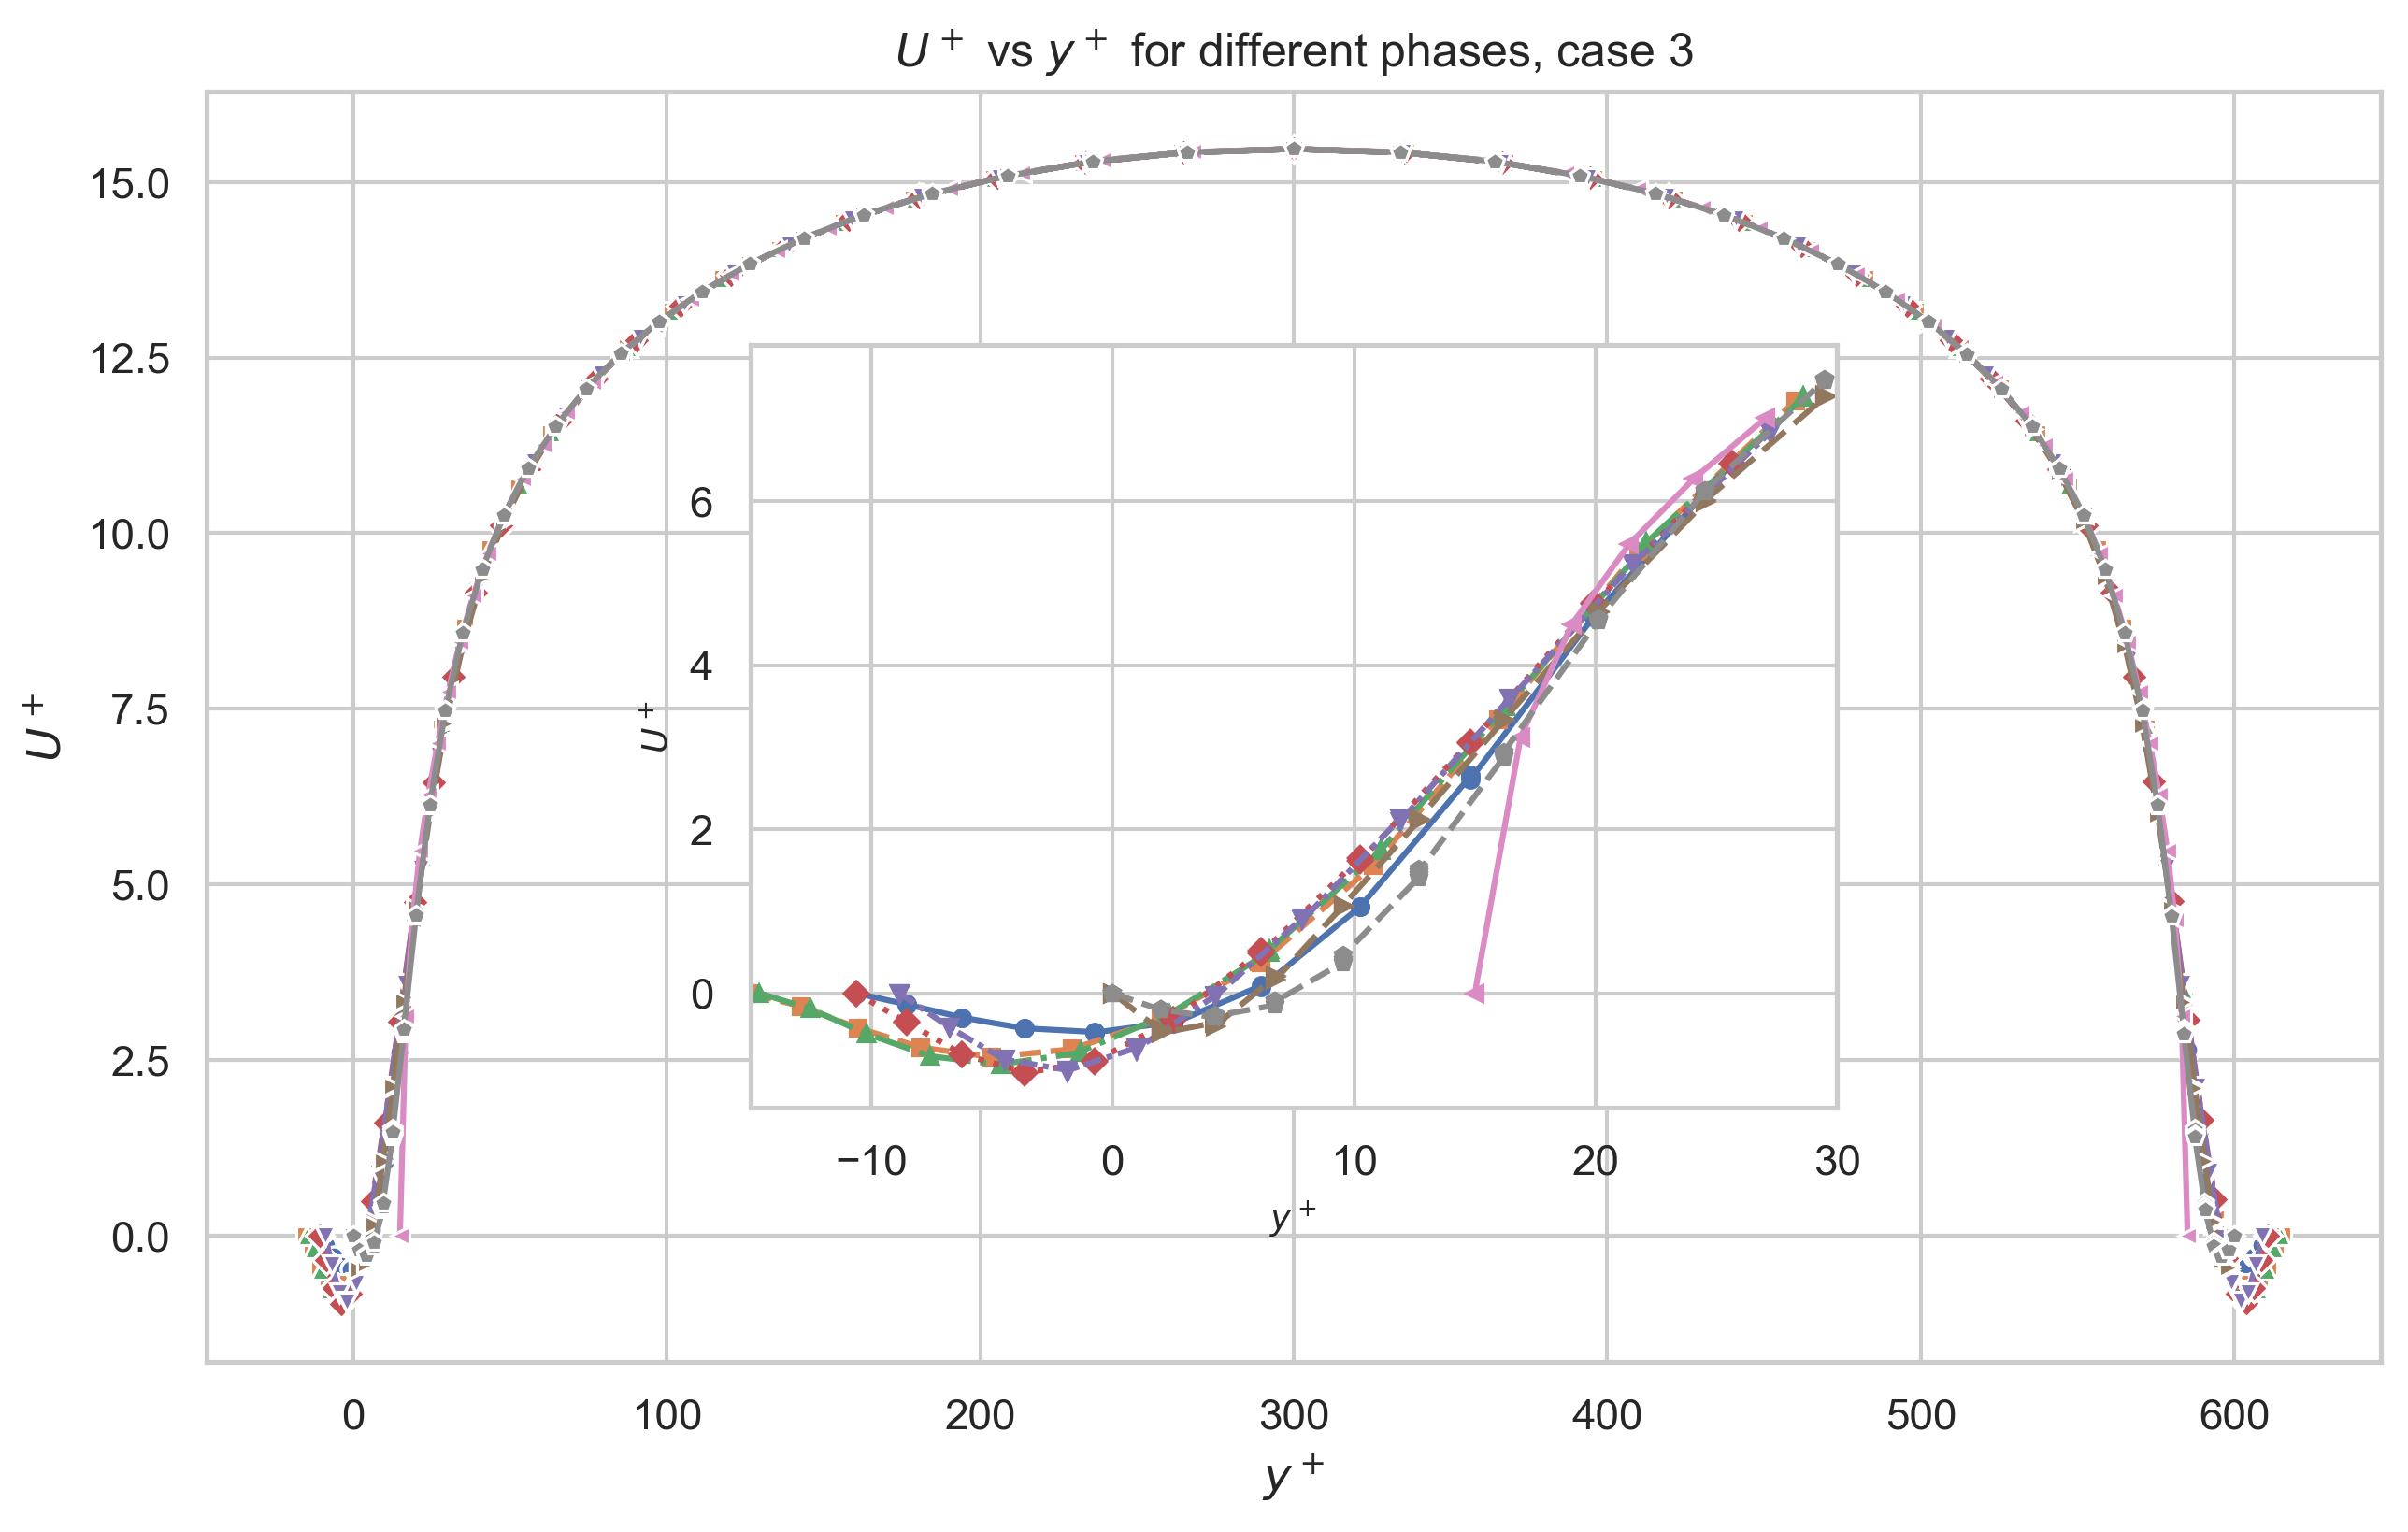

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sns.set(style='whitegrid')

sim_num = 3
pi_divs = [4, 2, 1.75, 1.3333333333333333, 1.25, 1, 0.6666666666666666, 0.5]

linestyles = ['-', '--', '-.', ':', (0,(3,1,1,1)), (0,(5,2)), '-', '--']
markers    = ['o', 's', '^', 'D', 'v', '>', '<', 'p']

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

handles, labels = [], []
all_zoom_xmins = []
all_zoom_ymins = []
all_zoom_ymaxs = []

for i, pi_div in enumerate(pi_divs):
    path = f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_sim_{sim_num}_phase_piby{pi_div}.csv'
    df = pd.read_csv(path).dropna(subset=['y_plus','U_plus']).sort_values('y_plus')

    frac = Fraction(1/pi_div).limit_denominator()
    label = f"${frac.numerator}\\pi$" if frac.denominator == 1 else f"$\\frac{{{frac.numerator}\\pi}}{{{frac.denominator}}}$"

    ln = sns.lineplot(
        ax=ax, data=df, x='y_plus', y='U_plus',
        legend=False,                               # ← no legend on main plot
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)], markersize=5
    )
    handles.append(ln.lines[-1])
    labels.append(label)

    # gather zoom stats for y+<30
    z = df[df['y_plus'] < 30]
    if not z.empty:
        all_zoom_xmins.append(z['y_plus'].min())
        all_zoom_ymins.append(z['U_plus'].min())
        all_zoom_ymaxs.append(z['U_plus'].max())

# ----- inset: zoom region -----
axins = inset_axes(ax, width="50%", height="60%", loc='center', borderpad=3)

for i, pi_div in enumerate(pi_divs):
    df = pd.read_csv(
        f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_sim_{sim_num}_phase_piby{pi_div}.csv'
    ).dropna(subset=['y_plus','U_plus']).sort_values('y_plus')
    z = df[df['y_plus'] < 30]
    axins.plot(
        z['y_plus'], z['U_plus'],
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)], markersize=4
    )

# use real mins/maxs from data for nicer limits
xmin = min(all_zoom_xmins) if all_zoom_xmins else 0
ymin = min(all_zoom_ymins) if all_zoom_ymins else None
ymax = max(all_zoom_ymaxs) if all_zoom_ymaxs else None

axins.set_xlim(xmin, 30)
if ymin is not None and ymax is not None:
    pad = 0.05*(ymax - ymin if ymax>ymin else 1.0)
    axins.set_ylim(ymin - pad, ymax + pad)
axins.set_xlabel(r'$y^+$', fontsize=9)
axins.set_ylabel(r'$U^+$', fontsize=9)
axins.grid(True)

# main axes styling
ax.set_title(r'$U^+$ vs $y^+$ for different phases, case {}'.format(sim_num))
ax.set_xlabel(r'$y^+$'); ax.set_ylabel(r'$U^+$'); ax.grid(True)

plt.savefig(f'u+_vs_y+_phases_sim{sim_num}_with_inset.png', bbox_inches='tight', dpi=300)
plt.show()

# ----- separate legend figure (a “table-like” legend) -----
fig_leg = plt.figure(figsize=(3.2, 0.42*len(labels)+0.6), dpi=300)
fig_leg.legend(handles, labels, loc='center', frameon=True, title='Phase', ncol=1)
fig_leg.savefig(f'legend_phases_sim{sim_num}.png', bbox_inches='tight', dpi=300)
plt.close(fig_leg)
plt.show()

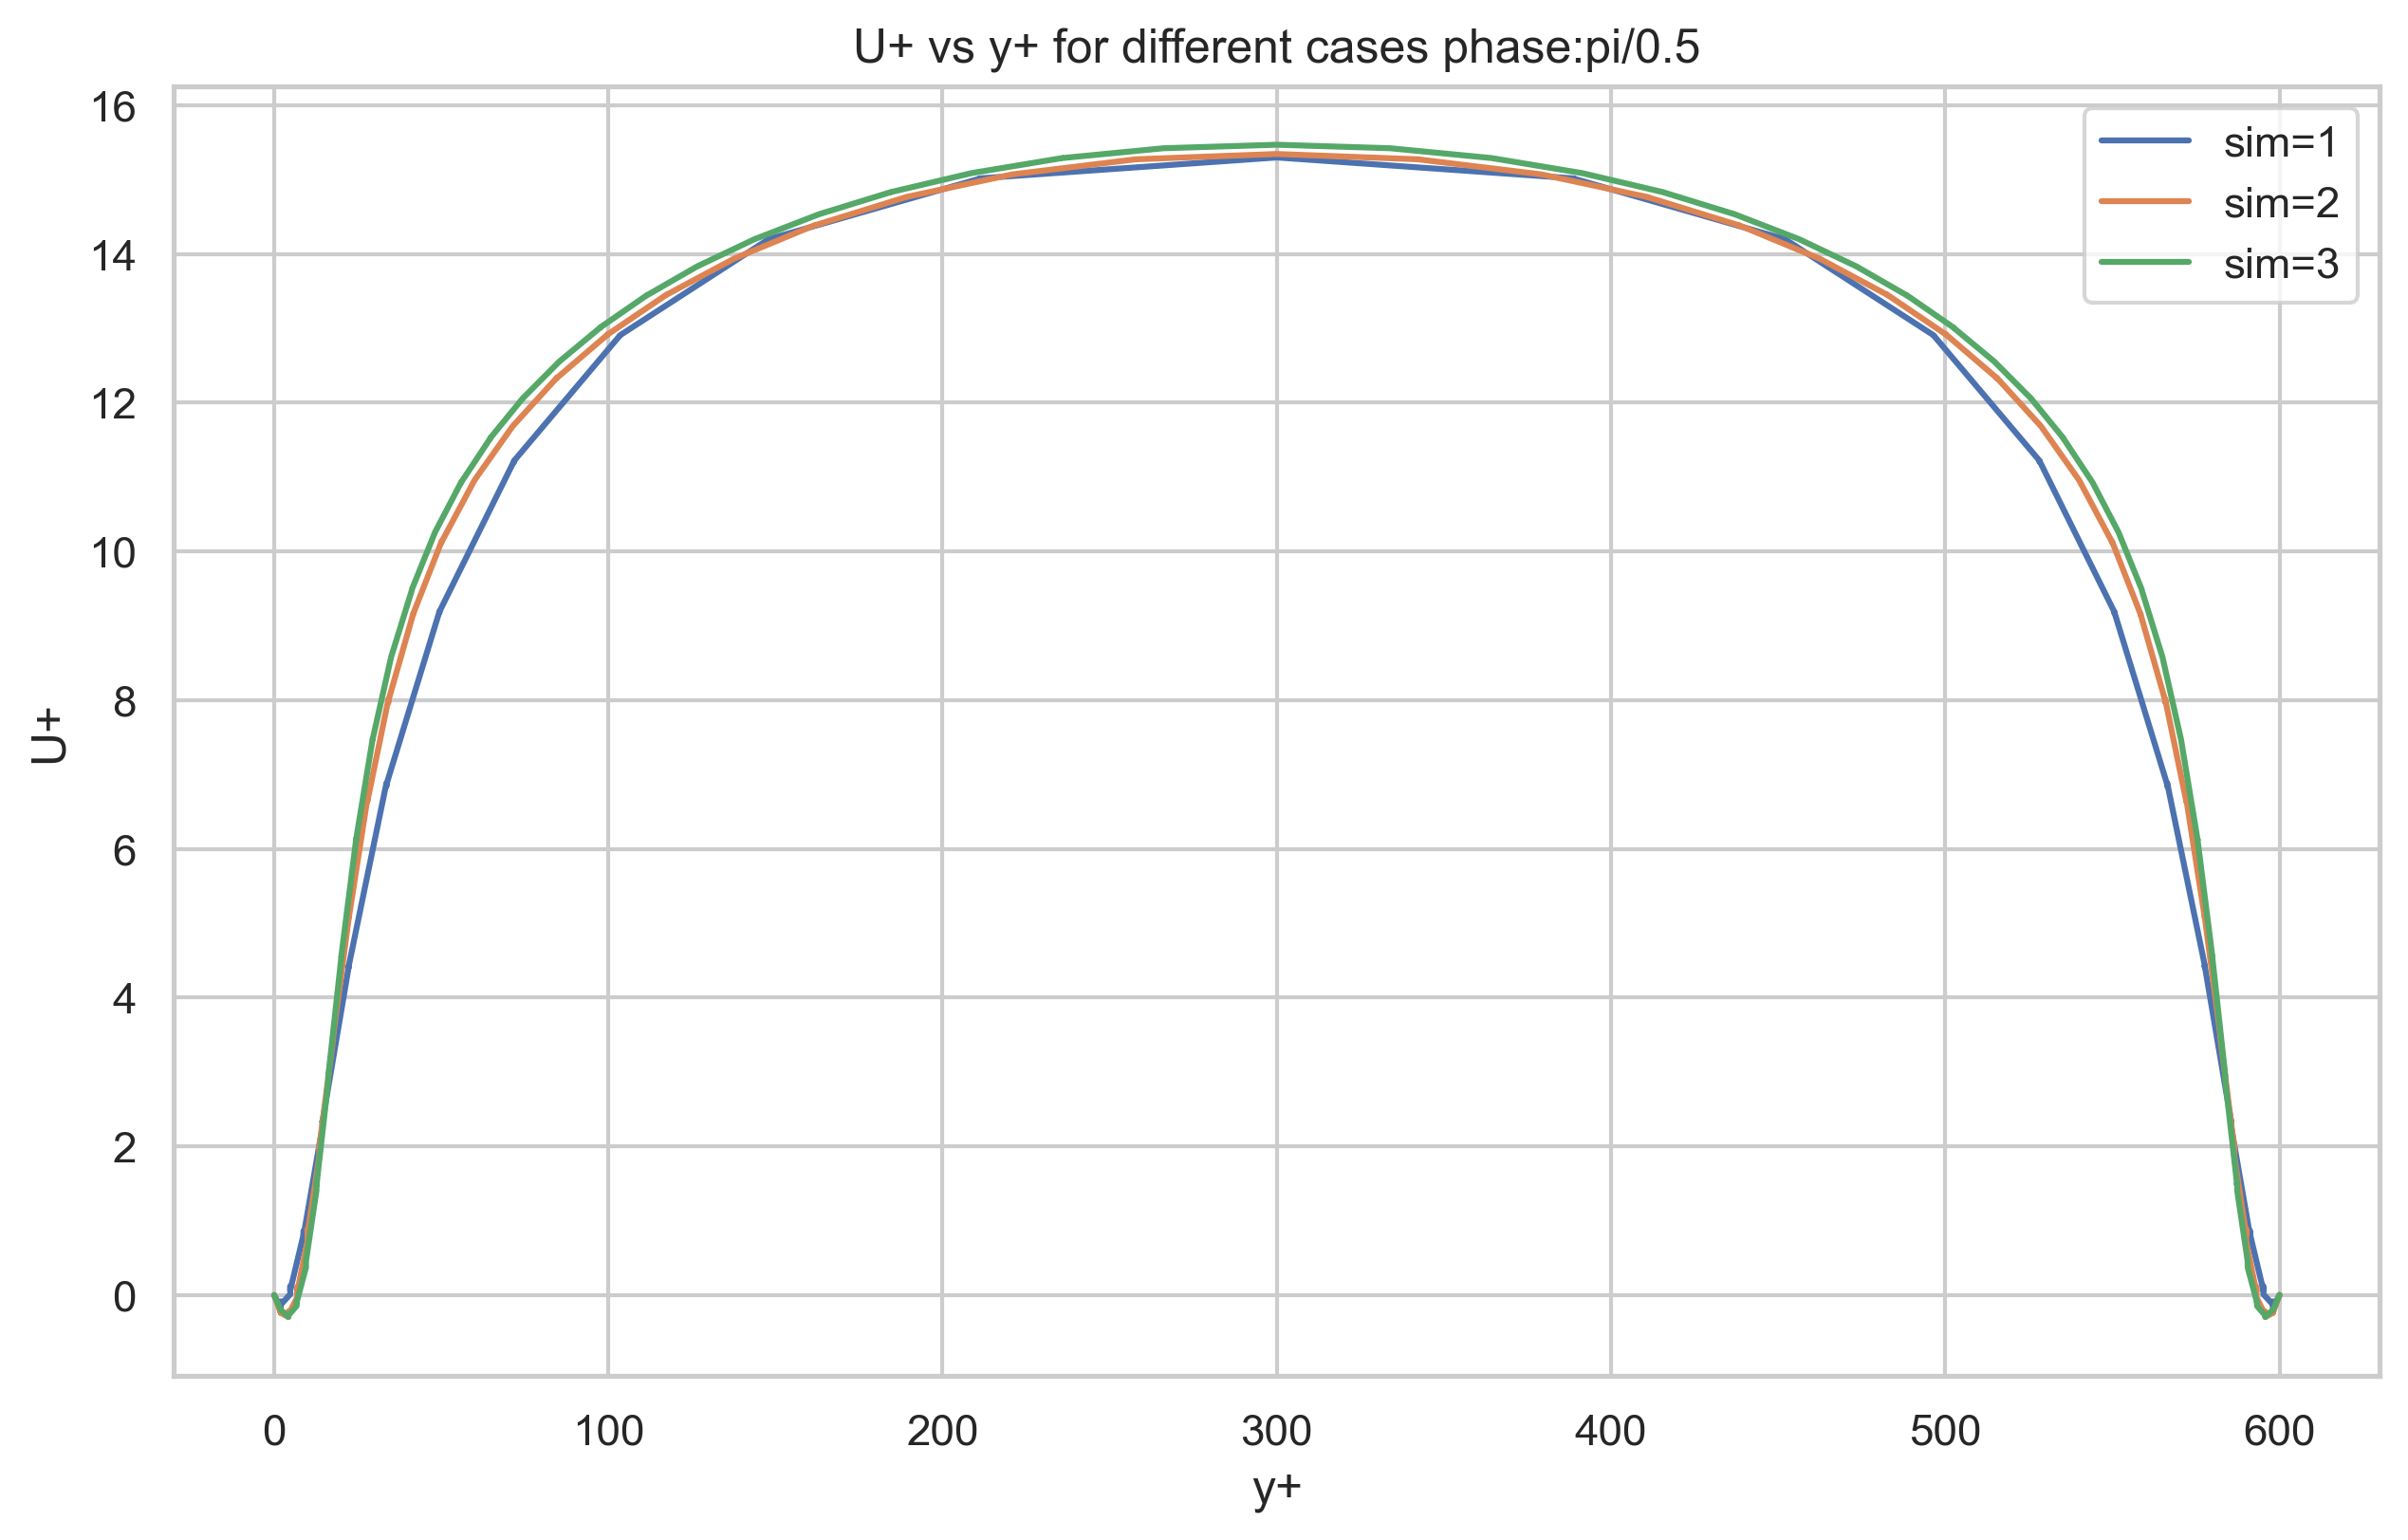

In [3]:
#plotting different phases from the same case
#change sim num 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

pi_div=0.5

for sim_num in [1,2,3 ]:  # replace with your parameter sweep
    df = pd.read_csv(f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_sim_{sim_num}_phase_piby{pi_div}.csv')
    sns.lineplot(data=df, x='y_plus', y='U_plus', label=f'sim={sim_num}')

plt.title(f'U+ vs y+ for different cases phase:pi/{pi_div}')
plt.xlabel('y+')
plt.ylabel('U+')
plt.legend()
plt.grid(True)
plt.savefig(f'u+ vs y+ case comparison phase piby{pi_div}.png')
plt.show()


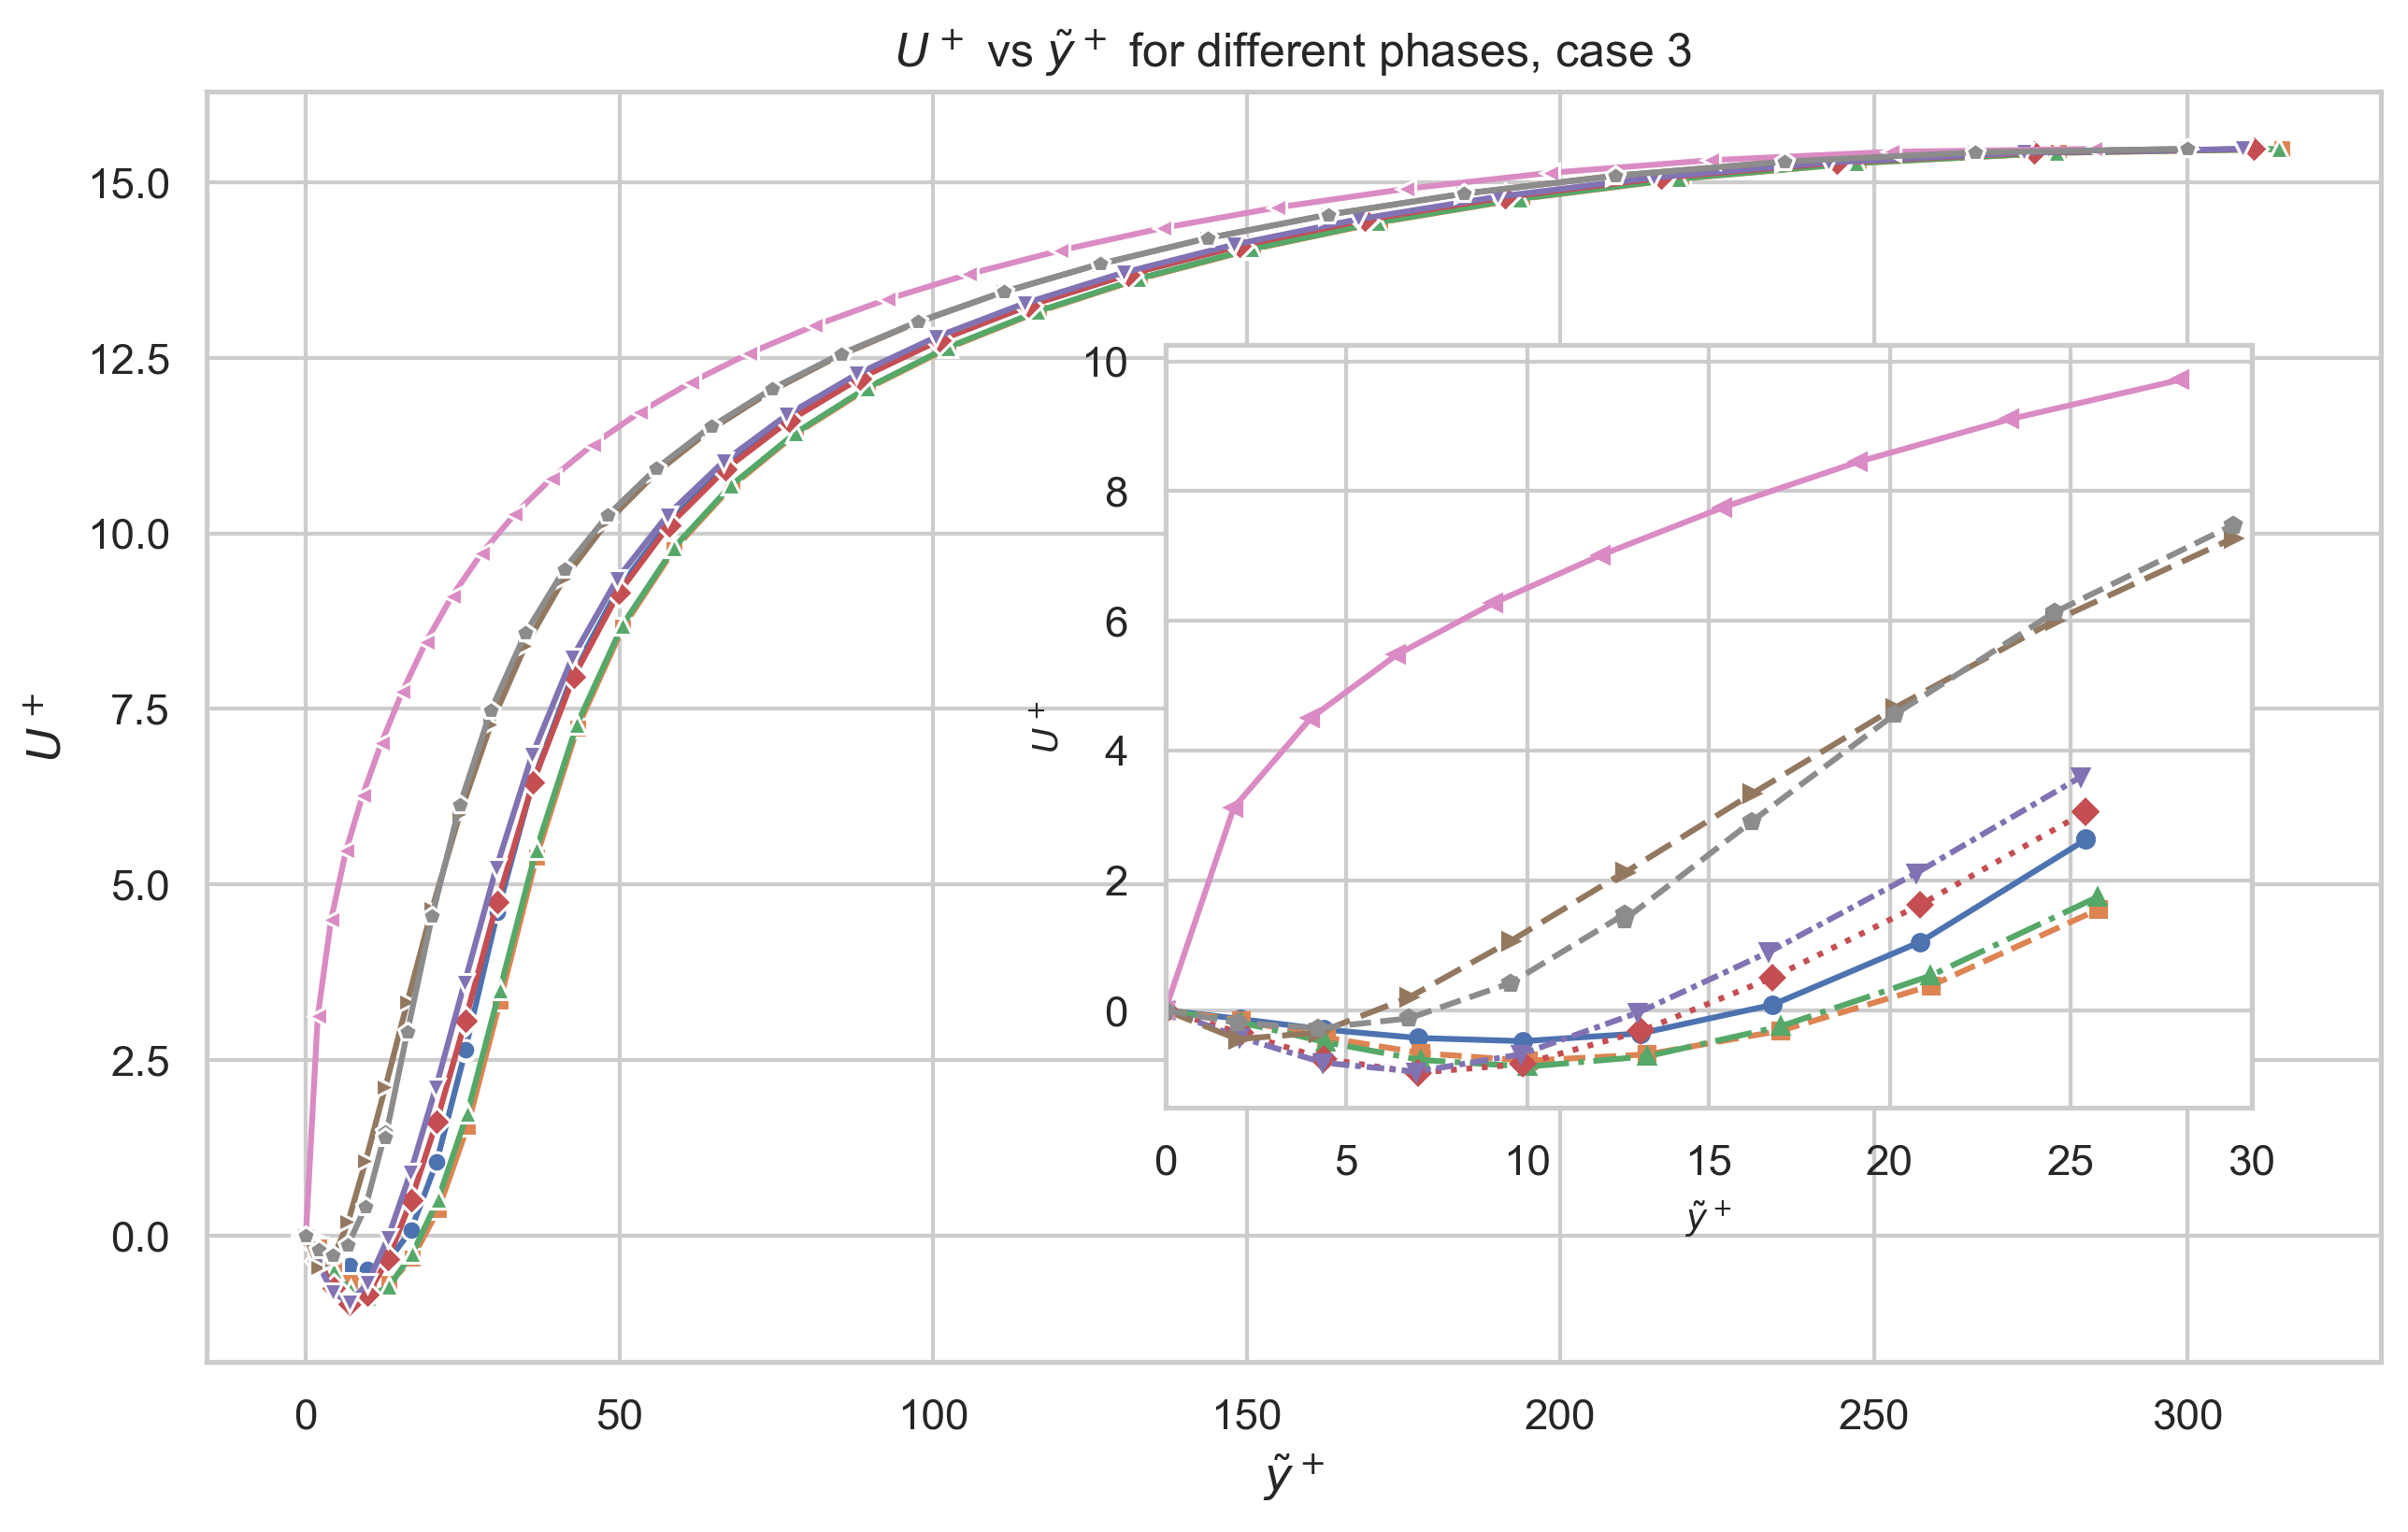

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ---------- settings ----------
sns.set(style='whitegrid')
sim_num = 3
pi_divs = [4, 2, 1.75, 1.3333333333333333, 1.25, 1, 0.6666666666666666, 0.5]

# distinct styles to help distinguish lines
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2)), '-', '--']
markers    = ['o', 's', '^', 'D', 'v', '>', '<', 'p']

# ---------- main figure ----------
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

handles, labels = [], []
all_zoom_xmins, all_zoom_ymins, all_zoom_ymaxs = [], [], []

for i, pi_div in enumerate(pi_divs):
    path = f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv'
    df = pd.read_csv(path).dropna(subset=['y_plus_wavy', 'U_plus']).sort_values('y_plus_wavy')

    # pretty phase label: e.g., 4π/3, 2π, π/2, etc.
    frac = Fraction(1 / pi_div).limit_denominator()
    label = f"${frac.numerator}\\pi$" if frac.denominator == 1 else f"$\\frac{{{frac.numerator}\\pi}}{{{frac.denominator}}}$"

    ln = sns.lineplot(
        ax=ax, data=df, x='y_plus_wavy', y='U_plus',
        legend=False,
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)], markersize=5
    )
    handles.append(ln.lines[-1])
    labels.append(label)

    # collect stats for the inset (y_tilde+ < 30)
    z = df[df['y_plus_wavy'] < 30]
    if not z.empty:
        all_zoom_xmins.append(z['y_plus_wavy'].min())
        all_zoom_ymins.append(z['U_plus'].min())
        all_zoom_ymaxs.append(z['U_plus'].max())

# ---- inset: zoom for y_tilde+ < 30 ----
axins = inset_axes(ax, width="50%", height="60%", loc='center right', borderpad=3)

for i, pi_div in enumerate(pi_divs):
    df = pd.read_csv(
        f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv'
    ).dropna(subset=['y_plus_wavy','U_plus']).sort_values('y_plus_wavy')
    z = df[df['y_plus_wavy'] < 30]
    if not z.empty:
        axins.plot(
            z['y_plus_wavy'], z['U_plus'],
            linestyle=linestyles[i % len(linestyles)],
            marker=markers[i % len(markers)], markersize=4
        )

# set inset limits based on actual data
xmin = min(all_zoom_xmins) if all_zoom_xmins else 0.0
axins.set_xlim(xmin, 30)

if all_zoom_ymins and all_zoom_ymaxs:
    ymin = min(all_zoom_ymins)
    ymax = max(all_zoom_ymaxs)
    pad = 0.05 * (ymax - ymin if ymax > ymin else 1.0)
    axins.set_ylim(ymin - pad, ymax + pad)

axins.set_xlabel(r'$\tilde{y}^+$', fontsize=9)
axins.set_ylabel(r'$U^+$', fontsize=9)
axins.grid(True)

# main axes cosmetics
ax.set_title(r'$U^+$ vs $\tilde{{y}}^+$ for different phases, case {}'.format(sim_num))
ax.set_xlabel(r'$\tilde{y}^+$')
ax.set_ylabel(r'$U^+$')
ax.grid(True)







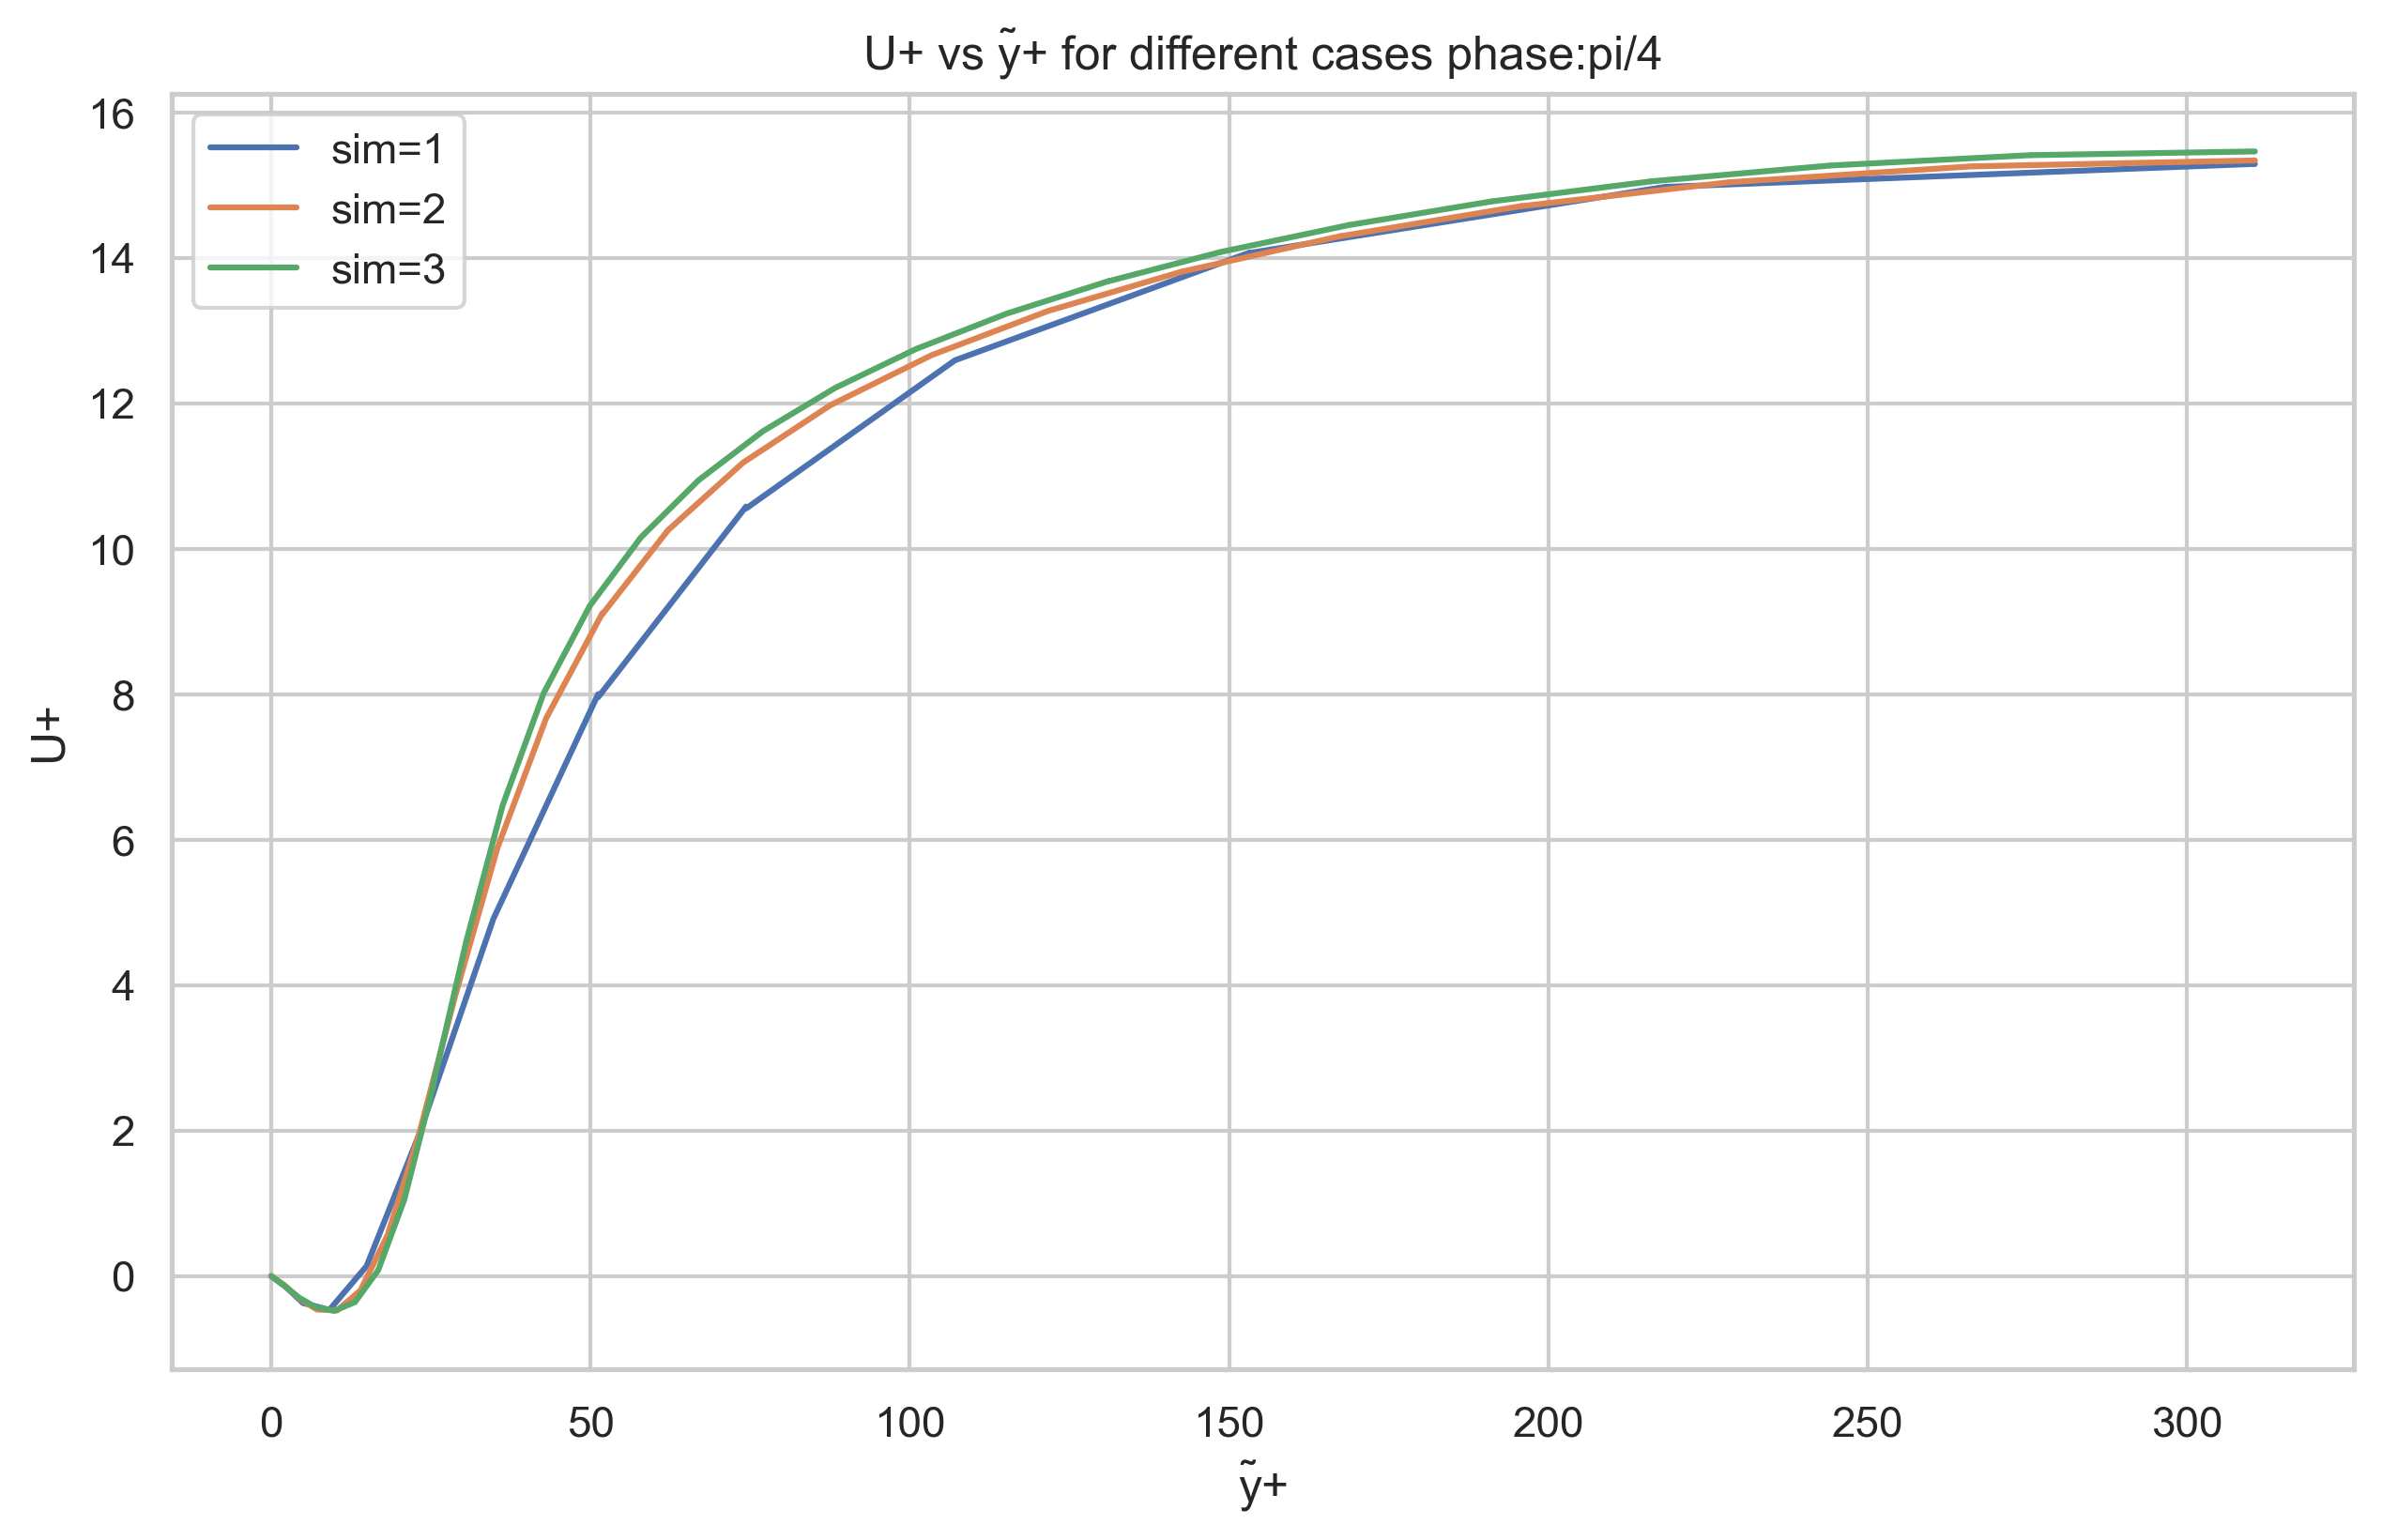

In [6]:
#plotting different phases from the same case
#change sim num 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

pi_div=4

for sim_num in [1,2,3 ]:  # replace with your parameter sweep
    df = pd.read_csv(f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv')
    sns.lineplot(data=df, x='y_plus_wavy', y='U_plus', label=f'sim={sim_num}')

plt.title(f'U+ vs y\u0303+ for different cases phase:pi/{pi_div}')
plt.xlabel('y\u0303+')
plt.ylabel('U+')
plt.legend()
plt.grid(True)
plt.savefig(f'U+ vs y\u0303+ for different cases phase piby{pi_div}')
plt.show()


<ipython-input-16-91ec8c48822f>:37: RuntimeWarning: Mean of empty slice
  U_avg = np.nanmean(interpolated_array, axis=0)


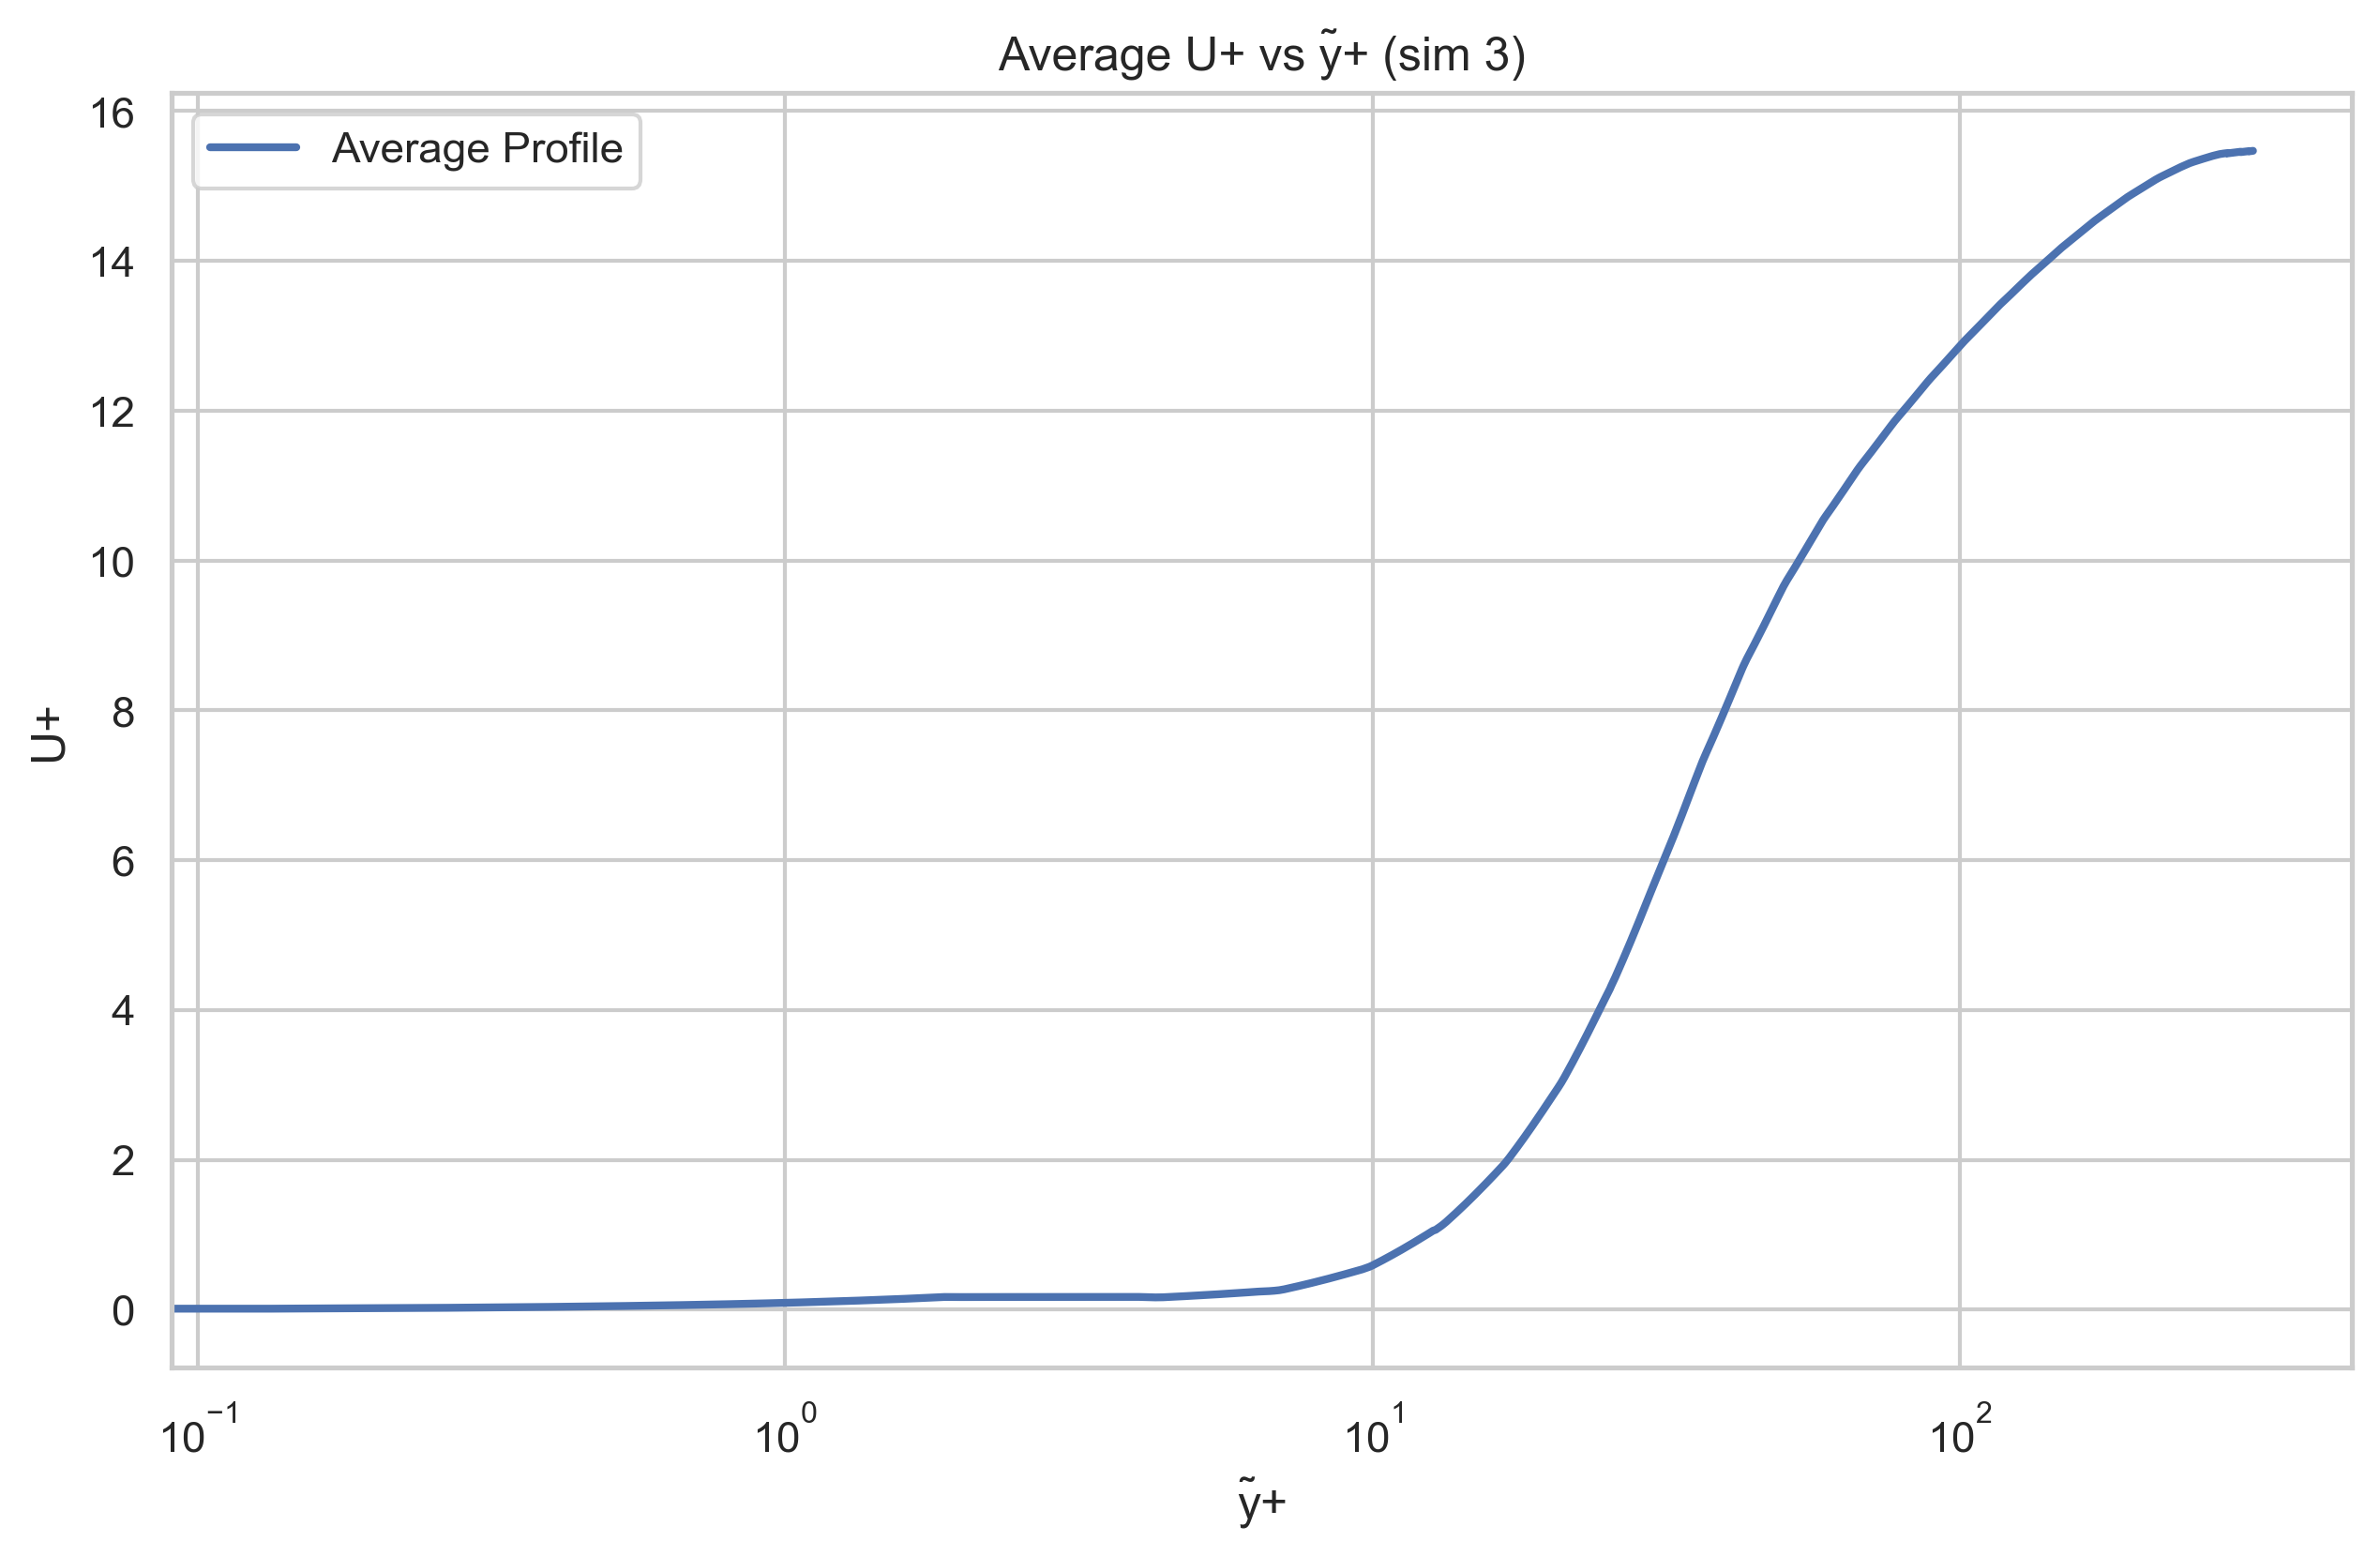

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

# === Settings ===
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

sim_num = 3
pi_div_list = [4, 2, 1.75, 1.3333333333333333, 1.25, 1, 0.6666666666666666, 0.5]

# === Step 1: Define common y grid ===
common_y_plus = np.linspace(0, 400, 3000)  # adjust as needed

# === Step 2: Interpolate each dataset to the common grid ===
interpolated_U_plus = []

for pi_div in pi_div_list:
    path = f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv'
    df = pd.read_csv(path)

    # Drop NaNs and sort by y for safe interpolation
    df = df.dropna(subset=['y_plus_wavy', 'U_plus']).sort_values('y_plus_wavy')

    # Create interpolation function
    interp_func = interp1d(df['y_plus_wavy'], df['U_plus'], kind='linear',
                           bounds_error=False, fill_value=np.nan)
    
    # Interpolate to common y grid
    U_interp = interp_func(common_y_plus)
    interpolated_U_plus.append(U_interp)

# === Step 3: Convert to DataFrame and compute average (ignoring NaNs) ===
interpolated_array = np.vstack(interpolated_U_plus)  # shape: (8, len(common_y_plus))
U_avg = np.nanmean(interpolated_array, axis=0)

# === Step 4: Plot ===
plt.plot(common_y_plus, U_avg, label='Average Profile', linewidth=2)
plt.title(f'Average U+ vs y\u0303+ (sim {sim_num})')
plt.xscale('log')
plt.xlabel('y\u0303+')
plt.ylabel('U+')
plt.grid(True)
plt.legend()
plt.savefig(f'avg_u+_vs_y_wavy+_sim{sim_num}.png')
plt.show()
